In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [4]:
df=pd.read_csv('/content/Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df['Age'].isnull().sum()

177

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-20-87998de08e8b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


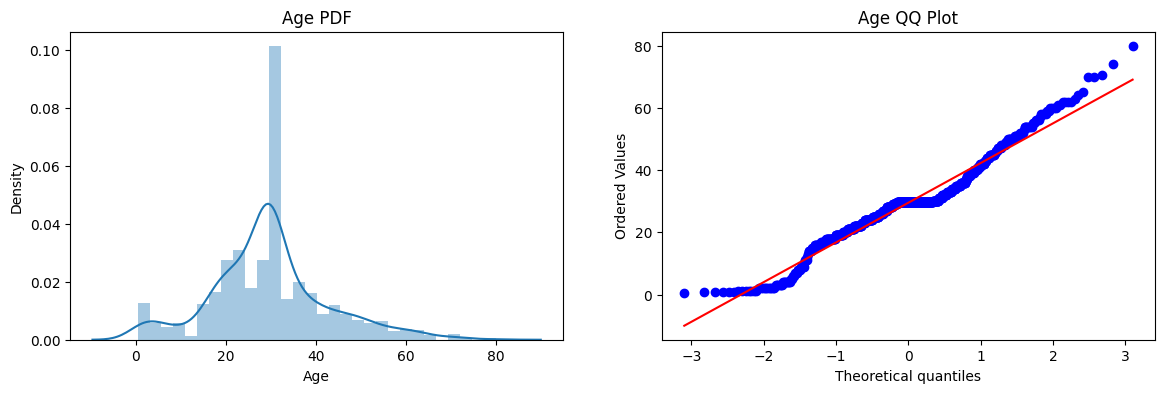

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.show()

<ipython-input-22-5e5225f35f7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


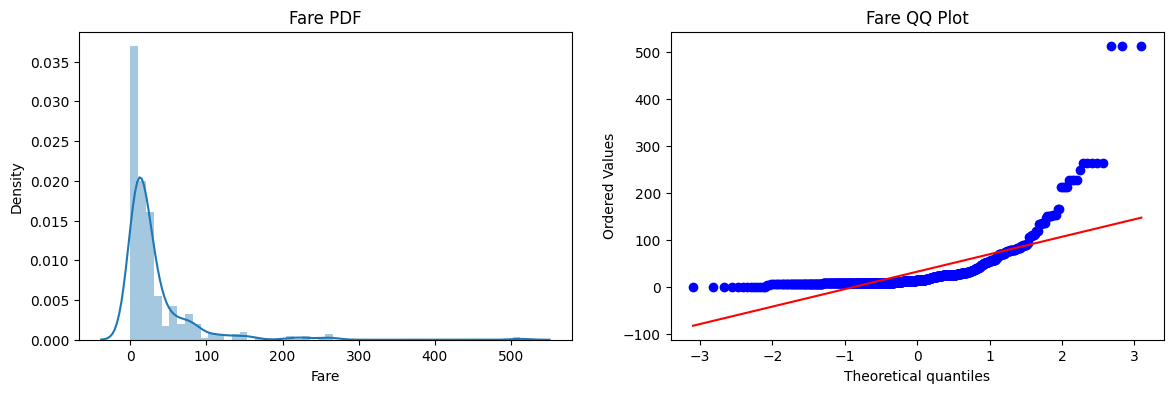

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [23]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [24]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=clf1.predict(X_test)
y_pred1=clf2.predict(X_test)

In [27]:
print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [28]:
trf=FunctionTransformer(func=np.log1p)

In [29]:
X_trained_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [30]:
clf1.fit(X_trained_transformed,y_train)
clf2.fit(X_trained_transformed,y_train)

DecisionTreeClassifier()

In [31]:
y_pred=clf1.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

In [32]:
print('Accuracy of LR', accuracy_score(y_test,y_pred))
print('Accuracy of DT', accuracy_score(y_test,y_pred1))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.6871508379888268


In [33]:
X_transformed=trf.fit_transform(X)

In [34]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6521223470661672


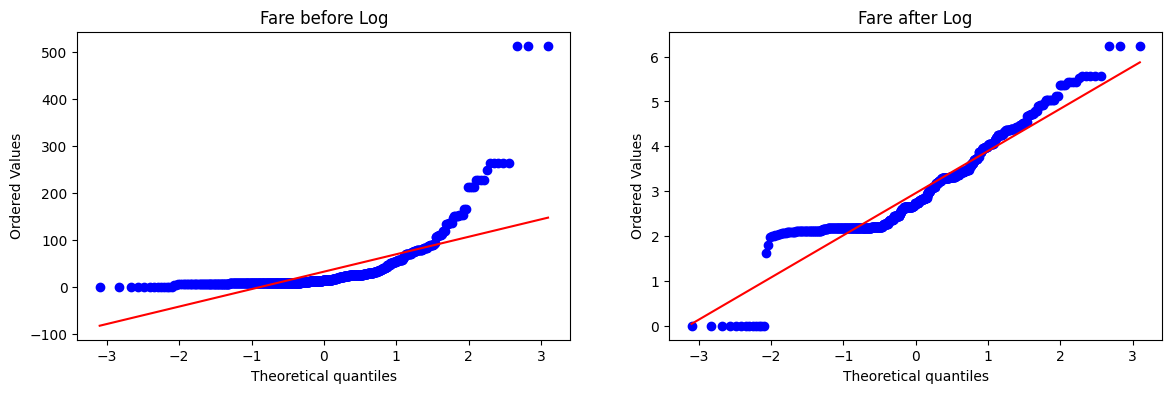

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm' , plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_trained_transformed['Fare'], dist='norm' , plot=plt)
plt.title('Fare after Log')
plt.show()

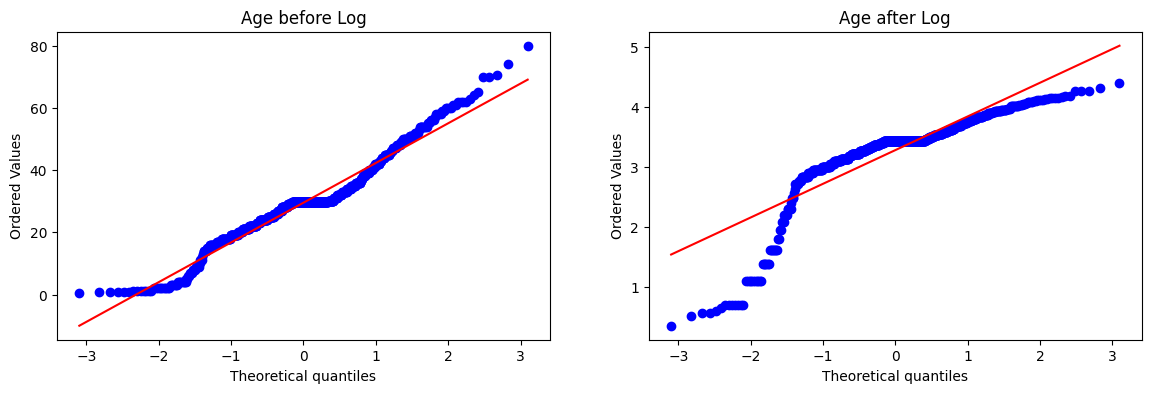

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm' , plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_trained_transformed['Age'], dist='norm' , plot=plt)
plt.title('Age after Log')
plt.show()

In [37]:
trf2=ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough')

In [38]:
X_trained_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [40]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_trained_transformed2,y_train)
clf2.fit(X_trained_transformed2,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=clf.predict(X_test_transformed2)
y_pred1=clf2.predict(X_test_transformed2)

In [42]:
print('Accuracy of LR', accuracy_score(y_test,y_pred))
print('Accuracy of DT', accuracy_score(y_test,y_pred1))

Accuracy of LR 0.6703910614525139
Accuracy of DT 0.659217877094972
